### 加载和预处理CT数据

In [8]:
# 加载nii数据
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# 加载nii数据
ct_image = nib.load('Data/study_001.nii')
ct_data = ct_image.get_fdata()



### 初步阈值分割

In [9]:
# 定义阈值，通常肺部区域的像素值较低
threshold = -1000

# 阈值分割
lung_mask = ct_data > threshold


### 保留气管和支气管


In [10]:
import scipy.ndimage as ndi

# 进行连通区域分析
labels, num_features = ndi.label(lung_mask)

# 保留较大的连通区域
sizes = ndi.sum(lung_mask, labels, range(num_features + 1))
mask_size = sizes < 500  # 去除小于500像素的区域，这个值可以调整
remove_pixel = mask_size[labels]
labels[remove_pixel] = 0

# 生成清理后的掩码
cleaned_lung_mask = labels > 0

# 应用掩码提取肺部
lung_extracted = ct_data * cleaned_lung_mask


### 显示多层切片

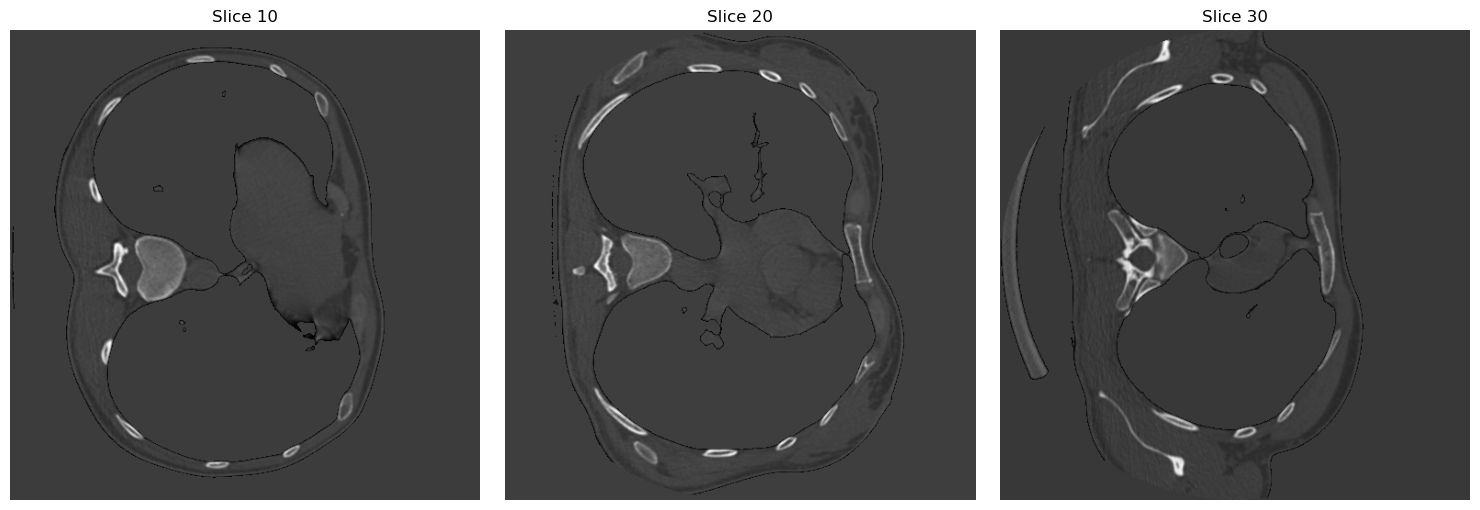

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 选择几层具有代表性的切片
slice_indices = [10, 20, 30]

for i, slice_index in enumerate(slice_indices):
    axes[i].imshow(lung_extracted[:, :, slice_index], cmap='gray')
    axes[i].set_title(f'Slice {slice_index}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### 快速CT叠加视图

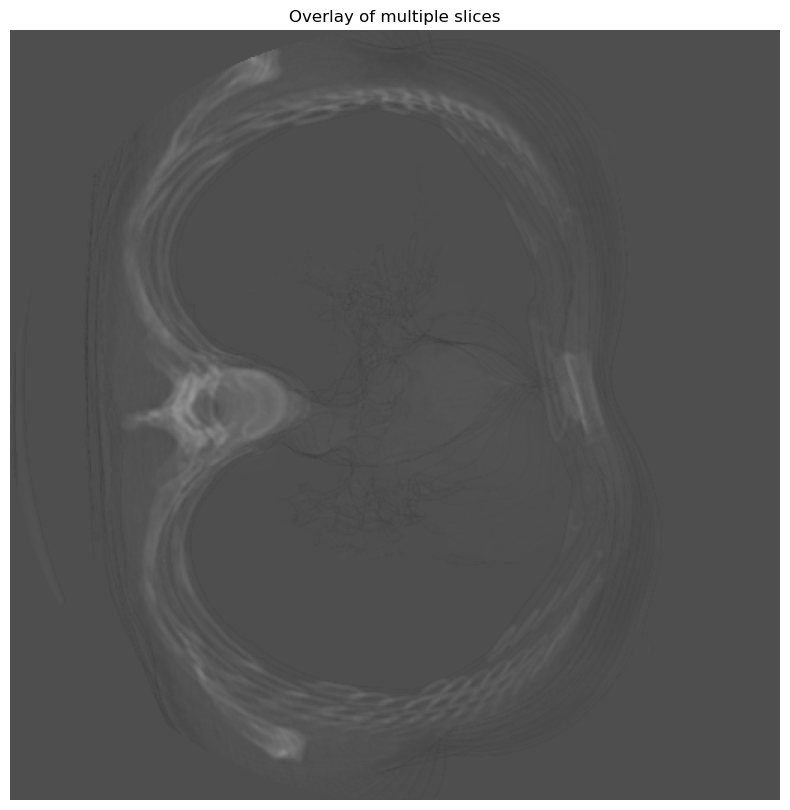

In [12]:
# 选择要叠加的切片范围
start_slice = 10
end_slice = 30

fig, ax = plt.subplots(figsize=(10, 10))

# 叠加多个切片的图像
for i in range(start_slice, end_slice):
    ax.imshow(lung_extracted[:, :, i], cmap='gray', alpha=0.1)

ax.set_title('Overlay of multiple slices')
ax.axis('off')

plt.show()
